In [1]:
import time
from pympler import asizeof
from svm_proxies import *
from sklearn import datasets
from sklearn.metrics import accuracy_score

## Updating piece by piece

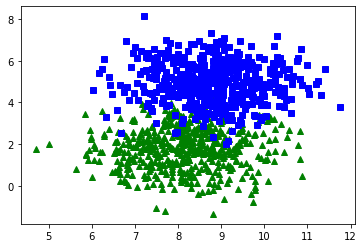

In [2]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box = (0, 10), random_state = 61)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [3]:
X_init, y_init = X[:500, :], y[:500]
X_u1, y_u1 = X[500:700, :], y[500: 700]
X_u2, y_u2 = X[700:, :], y[700:]

In [4]:
qp_svm = online_svm_qp()
s = time.time()
qp_svm.fit(X_init, y_init)
print('qp_svm     :', time.time() - s, 'seconds')

X_a, y_a = X_init, y_init
ridge_svm = online_lssvm(1e-6)
s = time.time()
ridge_svm.fit(X_a, y_a)
print('ridge svm  :', time.time() - s, 'seconds')

sgd_svm = online_svm_sgd()
s = time.time()
sgd_svm.fit(X_a, y_a)
print('sgd svm    :', time.time() - s, 'seconds')

attacker = SVC(kernel = 'linear')
s = time.time()
attacker.fit(X_a, y_a)
print('attacker   :', time.time() - s, 'seconds', end = "\n\n")

print('qp svm     : weights = ', np.round(qp_svm.weights, 4), '; bias = ', np.round(qp_svm.bias, 4))
print('attacker   : weights = ', np.round(attacker.coef_[0], 4), '; bias = ', np.round(attacker.intercept_[0], 4))
print('ridge svm  : weights = ', np.round(ridge_svm.weights, 4), '; bias = ', np.round(ridge_svm.bias, 4))
print('sgd svm    : weights = ', np.round(sgd_svm.weights, 4), '; bias = ', np.round(sgd_svm.bias, 4))

qp_svm     : 0.010004997253417969 seconds
ridge svm  : 0.041007280349731445 seconds
sgd svm    : 0.0020003318786621094 seconds
attacker   : 0.0009999275207519531 seconds

qp svm     : weights =  [0.3673 1.8946] ; bias =  -9.5295
attacker   : weights =  [0.3673 1.8946] ; bias =  -9.5295
ridge svm  : weights =  [0.0831 0.4351] ; bias =  -2.1585
sgd svm    : weights =  [ 9.6209 39.253 ] ; bias =  -233.269


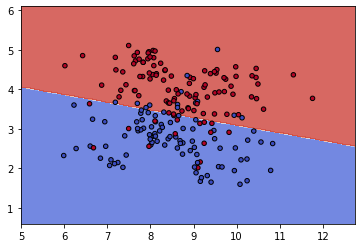

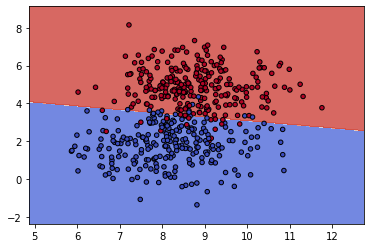

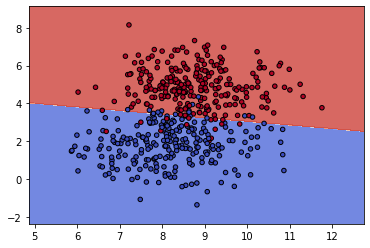

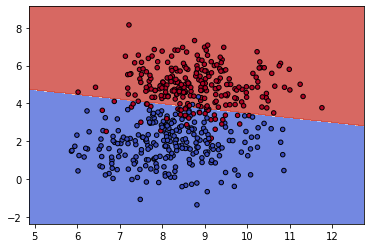

In [5]:
plot_decision_svm(qp_svm.X_retained, qp_svm.y_retained, qp_svm)
plot_decision_svm(X_a, y_a, attacker)
plot_decision_svm(X_a, y_a, ridge_svm)
plot_decision_svm(X_a, y_a, sgd_svm)

In [6]:
s = time.time()
qp_svm.update(X_u1, y_u1)
print('qp_svm     :', time.time() - s, 'seconds')

s = time.time()
ridge_svm.update(X_u1, y_u1)
print('ridge svm  :', time.time() - s, 'seconds')

s = time.time()
sgd_svm.update(X_u1, y_u1)
print('sgd svm    :', time.time() - s, 'seconds')

X_a = np.vstack((X_a, X_u1))
y_a = np.append(y_a, y_u1)

s = time.time()
attacker.fit(X_a, y_a)
print('attacker   :', time.time() - s, 'seconds', end = "\n\n")

print('qp svm     : weights = ', np.round(qp_svm.weights, 4), '; bias = ', np.round(qp_svm.bias, 4))
print('attacker   : weights = ', np.round(attacker.coef_[0], 4), '; bias = ', np.round(attacker.intercept_[0], 4))
print('ridge svm  : weights = ', np.round(ridge_svm.weights, 4), '; bias = ', np.round(ridge_svm.bias, 4))
print('ridge svm  : weights = ', np.round(sgd_svm.weights, 4), '; bias = ', np.round(sgd_svm.bias, 4))

qp_svm     : 0.0 seconds
ridge svm  : 0.0 seconds
sgd svm    : 0.015628814697265625 seconds
attacker   : 0.003512144088745117 seconds

qp svm     : weights =  [0.3904 1.8706] ; bias =  -9.6019
attacker   : weights =  [0.3903 1.8702] ; bias =  -9.5999
ridge svm  : weights =  [0.0851 0.4361] ; bias =  -2.187
ridge svm  : weights =  [10.4284 38.503 ] ; bias =  -233.2666


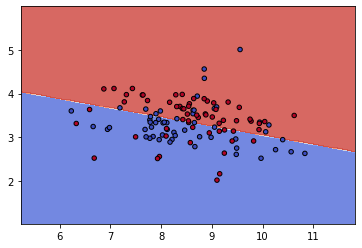

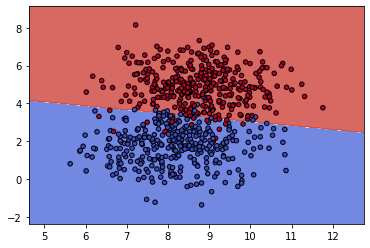

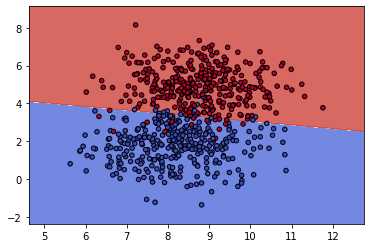

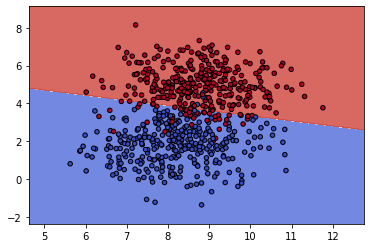

In [7]:
plot_decision_svm(qp_svm.X_retained, qp_svm.y_retained, qp_svm)
plot_decision_svm(X_a, y_a, attacker)
plot_decision_svm(X_a, y_a, ridge_svm)
plot_decision_svm(X_a, y_a, sgd_svm)

In [8]:
s = time.time()
qp_svm.update(X_u2, y_u2)
print('qp_svm     :', time.time() - s)

s = time.time()
ridge_svm.update(X_u2, y_u2)
print('ridge svm  :', time.time() - s)

s = time.time()
sgd_svm.update(X_u2, y_u2)
print('sgd svm    :', time.time() - s)

X_a = np.vstack((X_a, X_u2))
y_a = np.append(y_a, y_u2)

s = time.time()
attacker.fit(X_a, y_a)
print('attacker   :', time.time() - s, end = "\n\n")

print('qp svm     : weights = ', np.round(qp_svm.weights, 4), '; bias = ', np.round(qp_svm.bias, 4))
print('attacker   : weights = ', np.round(attacker.coef_[0], 4), '; bias = ', np.round(attacker.intercept_[0], 4))
print('ridge svm  : weights = ', np.round(ridge_svm.weights, 4), '; bias = ', np.round(ridge_svm.bias, 4))
print('ridge svm  : weights = ', np.round(sgd_svm.weights, 4), '; bias = ', np.round(sgd_svm.bias, 4))

qp_svm     : 0.009054899215698242
ridge svm  : 0.008001089096069336
sgd svm    : 0.0009992122650146484
attacker   : 0.004003286361694336

qp svm     : weights =  [0.376 1.941] ; bias =  -9.7841
attacker   : weights =  [0.376  1.9407] ; bias =  -9.7828
ridge svm  : weights =  [0.0773 0.4473] ; bias =  -2.1805
ridge svm  : weights =  [10.4606 39.9797] ; bias =  -232.8476


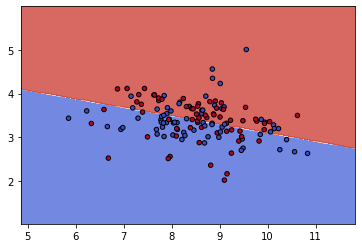

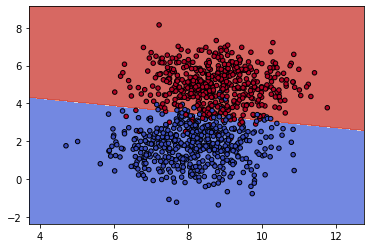

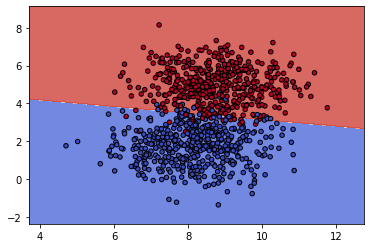

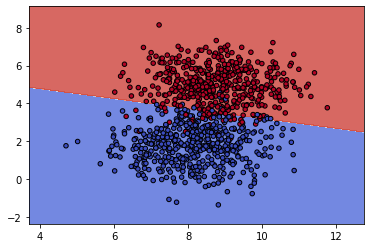

In [9]:
plot_decision_svm(qp_svm.X_retained, qp_svm.y_retained, qp_svm)
plot_decision_svm(X_a, y_a, attacker)
plot_decision_svm(X_a, y_a, ridge_svm)
plot_decision_svm(X_a, y_a, sgd_svm)

In [10]:
print('qp_svm    : ', str(asizeof.asizeof(qp_svm) / 1e6) + ' mb')
print('ridge_svm : ', str(asizeof.asizeof(ridge_svm) / 1e6) + ' mb') 
print('sgd_svm   : ', str(asizeof.asizeof(sgd_svm) / 1e6) + ' mb') 

qp_svm    :  0.026568 mb
ridge_svm :  0.000936 mb
sgd_svm   :  0.016136 mb


In [11]:
print(f'qp_svm    : ', accuracy_score(qp_svm.predict(X_a), y_a))
print(f'ridge svm : ', accuracy_score(ridge_svm.predict(X_a), y_a))
print(f'sgd svm   : ', accuracy_score(sgd_svm.predict(X_a), y_a))
print(f'attacker  : ', accuracy_score(attacker.predict(X_a), y_a))

qp_svm    :  0.946
ridge svm :  0.948
sgd svm   :  0.945
attacker  :  0.946


## Testing point by point

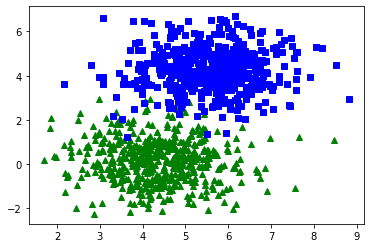

In [12]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box = (0, 10), random_state = 2)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [13]:
qp_svm = online_svm_qp()
s = time.time()
X_init, y_init = X[:5, :], y[:5]
qp_svm.fit(X_init, y_init) 

for i in range(100, 1000):
    qp_svm.update(X[i, :], y[i])

print('qp_svm     :', time.time() - s, 'seconds')
print('qp svm     : weights = ', np.round(qp_svm.weights, 4), '; bias = ', np.round(qp_svm.bias, 4))
print('qp_svm     :', accuracy_score(qp_svm.predict(X), y))

qp_svm     : 0.19083857536315918 seconds
qp svm     : weights =  [0.4449 1.6106] ; bias =  -5.7268
qp_svm     : 0.982


In [14]:
ridge_svm = online_lssvm()
s = time.time()
X_init, y_init = X[:5, :], y[:5]
ridge_svm.fit(X_init, y_init)

for i in range(100, 1000):
    ridge_svm.update(X[i, :], y[i])

print('ridge svm  :', time.time() - s, 'seconds')
print('ridge svm  : weights = ', np.round(ridge_svm.weights, 4), '; bias = ', np.round(ridge_svm.bias, 4))
print('ridge svm  :', accuracy_score(ridge_svm.predict(X), y))

ridge svm  : 0.170928955078125 seconds
ridge svm  : weights =  [0.1178 0.3655] ; bias =  -1.3908
ridge svm  : 0.981


In [15]:
sgd_svm = online_svm_sgd()
s = time.time()
X_init, y_init = X[:5, :], y[:5]
sgd_svm.fit(X_init, y_init)

for i in range(100, 1000):
    sgd_svm.update(X[i, :], y[i])

print('sgd svm    :', time.time() - s, 'seconds')
print('sgd svm    : weights = ', np.round(sgd_svm.weights, 4), '; bias = ', np.round(sgd_svm.bias, 4))
print('sgd svm    :', accuracy_score(sgd_svm.predict(X), y))

sgd svm    : 0.21079063415527344 seconds
sgd svm    : weights =  [-11.2722 104.5923] ; bias =  -142.0296
sgd svm    : 0.964


In [16]:
attacker = SVC(kernel = 'linear')
s = time.time()
attacker.fit(X, y)

print('attacker   :', time.time() - s, 'seconds')
print('attacker   : weights = ', np.round(attacker.coef_[0], 4), '; bias = ', np.round(attacker.intercept_[0], 4))
print('attacker   :', accuracy_score(attacker.predict(X), y))

attacker   : 0.0019931793212890625 seconds
attacker   : weights =  [0.4579 1.9259] ; bias =  -6.5835
attacker   : 0.983


In [17]:
print('qp_svm    : ', str(asizeof.asizeof(qp_svm) / 1e6) + ' mb')
print('ridge_svm : ', str(asizeof.asizeof(ridge_svm) / 1e6) + ' mb') 
print('sgd_svm   : ', str(asizeof.asizeof(sgd_svm) / 1e6) + ' mb') 

qp_svm    :  0.01196 mb
ridge_svm :  0.000936 mb
sgd_svm   :  0.004256 mb
